# Dataset Information

> **This dataset is recreated using offline augmentation from the original dataset. The original dataset can be found on this github repo. This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.**

# Importing Libraries

In [1]:
# Installing an extra package
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing all important libraries
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Dataset
dataset="/kaggle/input/new-plant-diseases-dataset"
# Training Data
train_data="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
# Validation Data
valid_data="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
# Testing Data
test_data="/kaggle/input/new-plant-diseases-dataset/test"

In [4]:
# Retrieve the list of diseases from the train_data and print it
diseases=os.listdir(train_data)
print(diseases)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [5]:
# Print the number of classes or diseases present in the train_data
print("Number of classes : ",len(diseases))

Number of classes :  38


In [6]:
# Count the number of images per class in the training data directory and display the counts in a DataFrame
nums_train={}
nums_valid={}
for disease in diseases:
    nums_train[disease]=len(os.listdir(train_data+'/'+disease))
    nums_valid[disease]=len(os.listdir(valid_data+'/'+disease))
image_class_count_train=pd.DataFrame(nums_train.values(),index=nums_train.keys(),columns=['No. of images'])
print('Training data images count per class : ',)
print(image_class_count_train)

Training data images count per class : 
                                                    No. of images
Tomato___Late_blight                                         1851
Tomato___healthy                                             1926
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Strawberry___Leaf_scorch                                     1774
Peach___healthy                                              1728
Apple___Apple_scab                  

In [7]:
# Count the number of images per class in the validation data directory and display the counts in a DataFrame
image_class_count_valid=pd.DataFrame(nums_valid.values(),index=nums_valid.keys(),columns=['No. of images'])
print('Validation data images count per class : ',)
print(image_class_count_valid)

Validation data images count per class : 
                                                    No. of images
Tomato___Late_blight                                          463
Tomato___healthy                                              481
Grape___healthy                                               423
Orange___Haunglongbing_(Citrus_greening)                      503
Soybean___healthy                                             505
Squash___Powdery_mildew                                       434
Potato___healthy                                              456
Corn_(maize)___Northern_Leaf_Blight                           477
Tomato___Early_blight                                         480
Tomato___Septoria_leaf_spot                                   436
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Strawberry___Leaf_scorch                                      444
Peach___healthy                                               432
Apple___Apple_scab                

<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

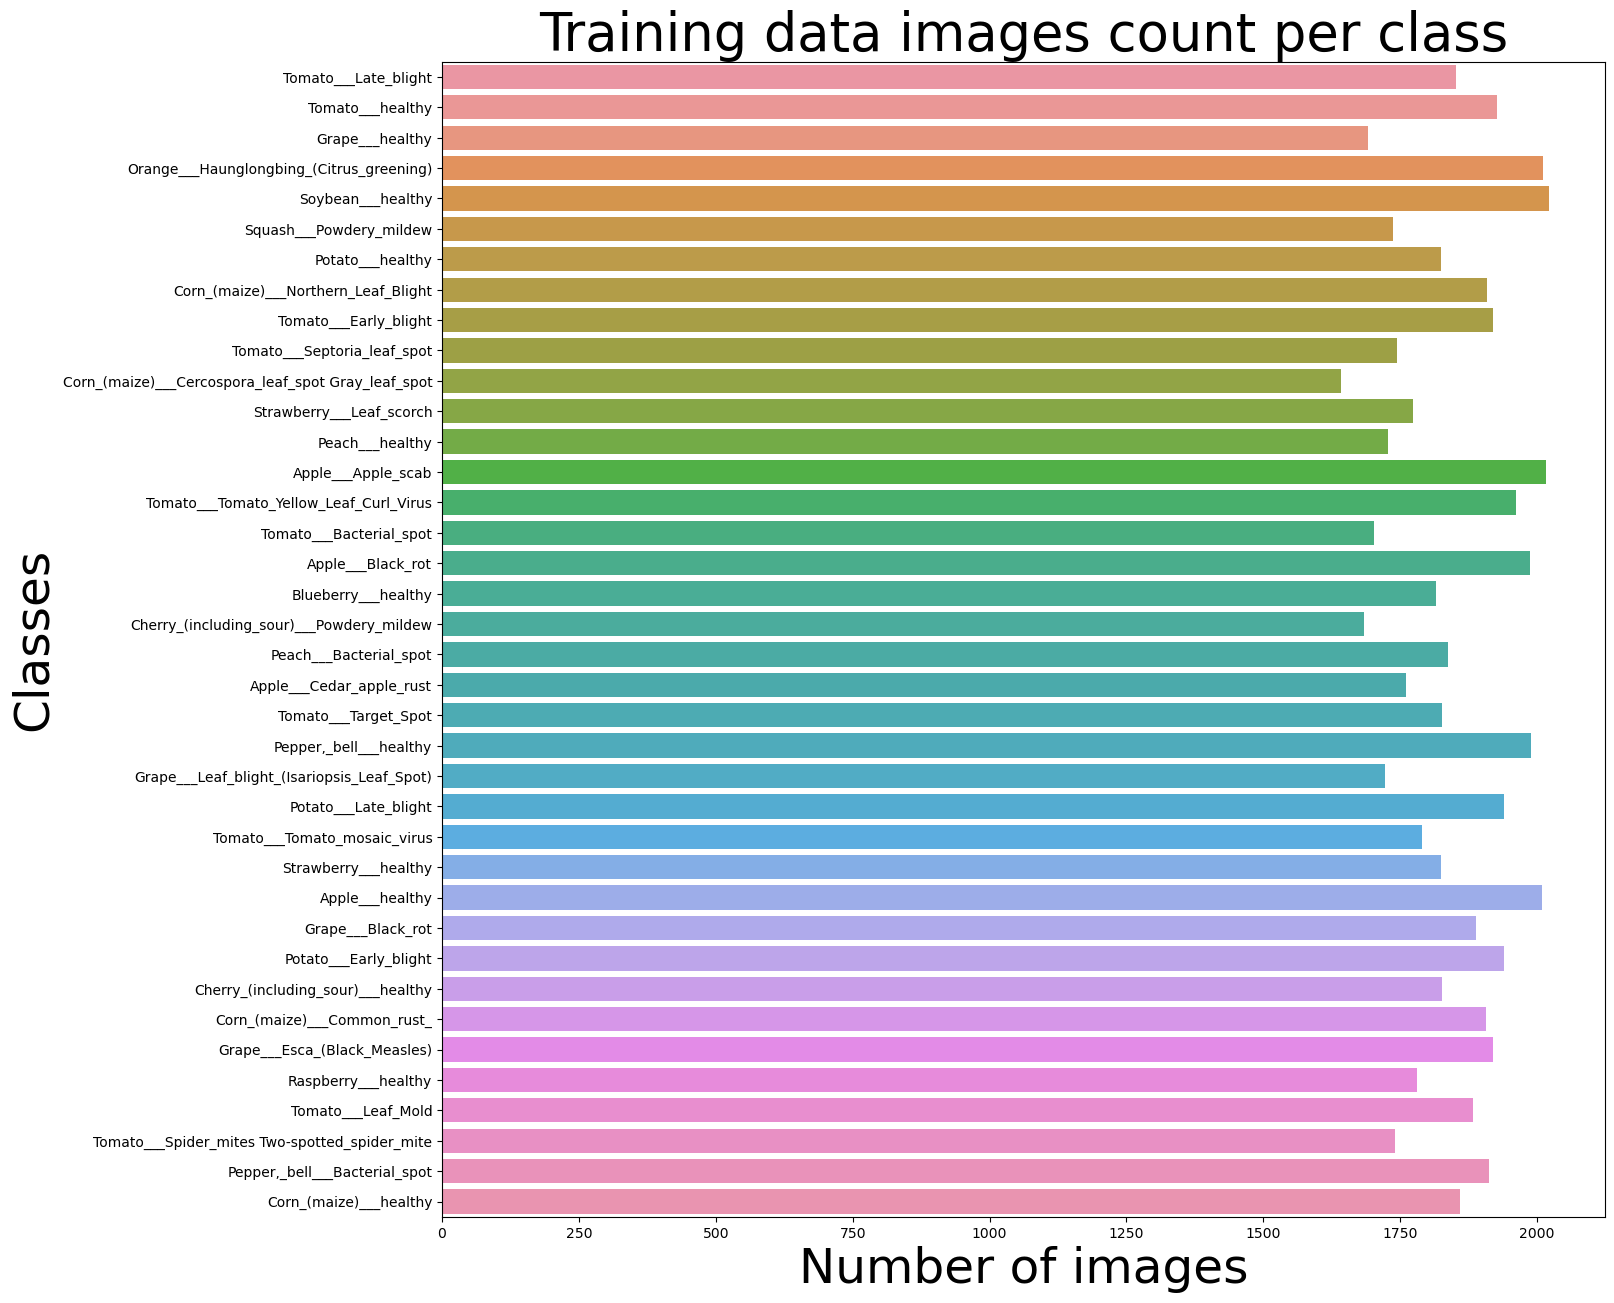

In [8]:
# Create a bar plot showing the count of training images per class
plt.figure(figsize=(15,15))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_train.keys())
vals=list(nums_train.values())
sns.barplot(y=keys,x=vals)

<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

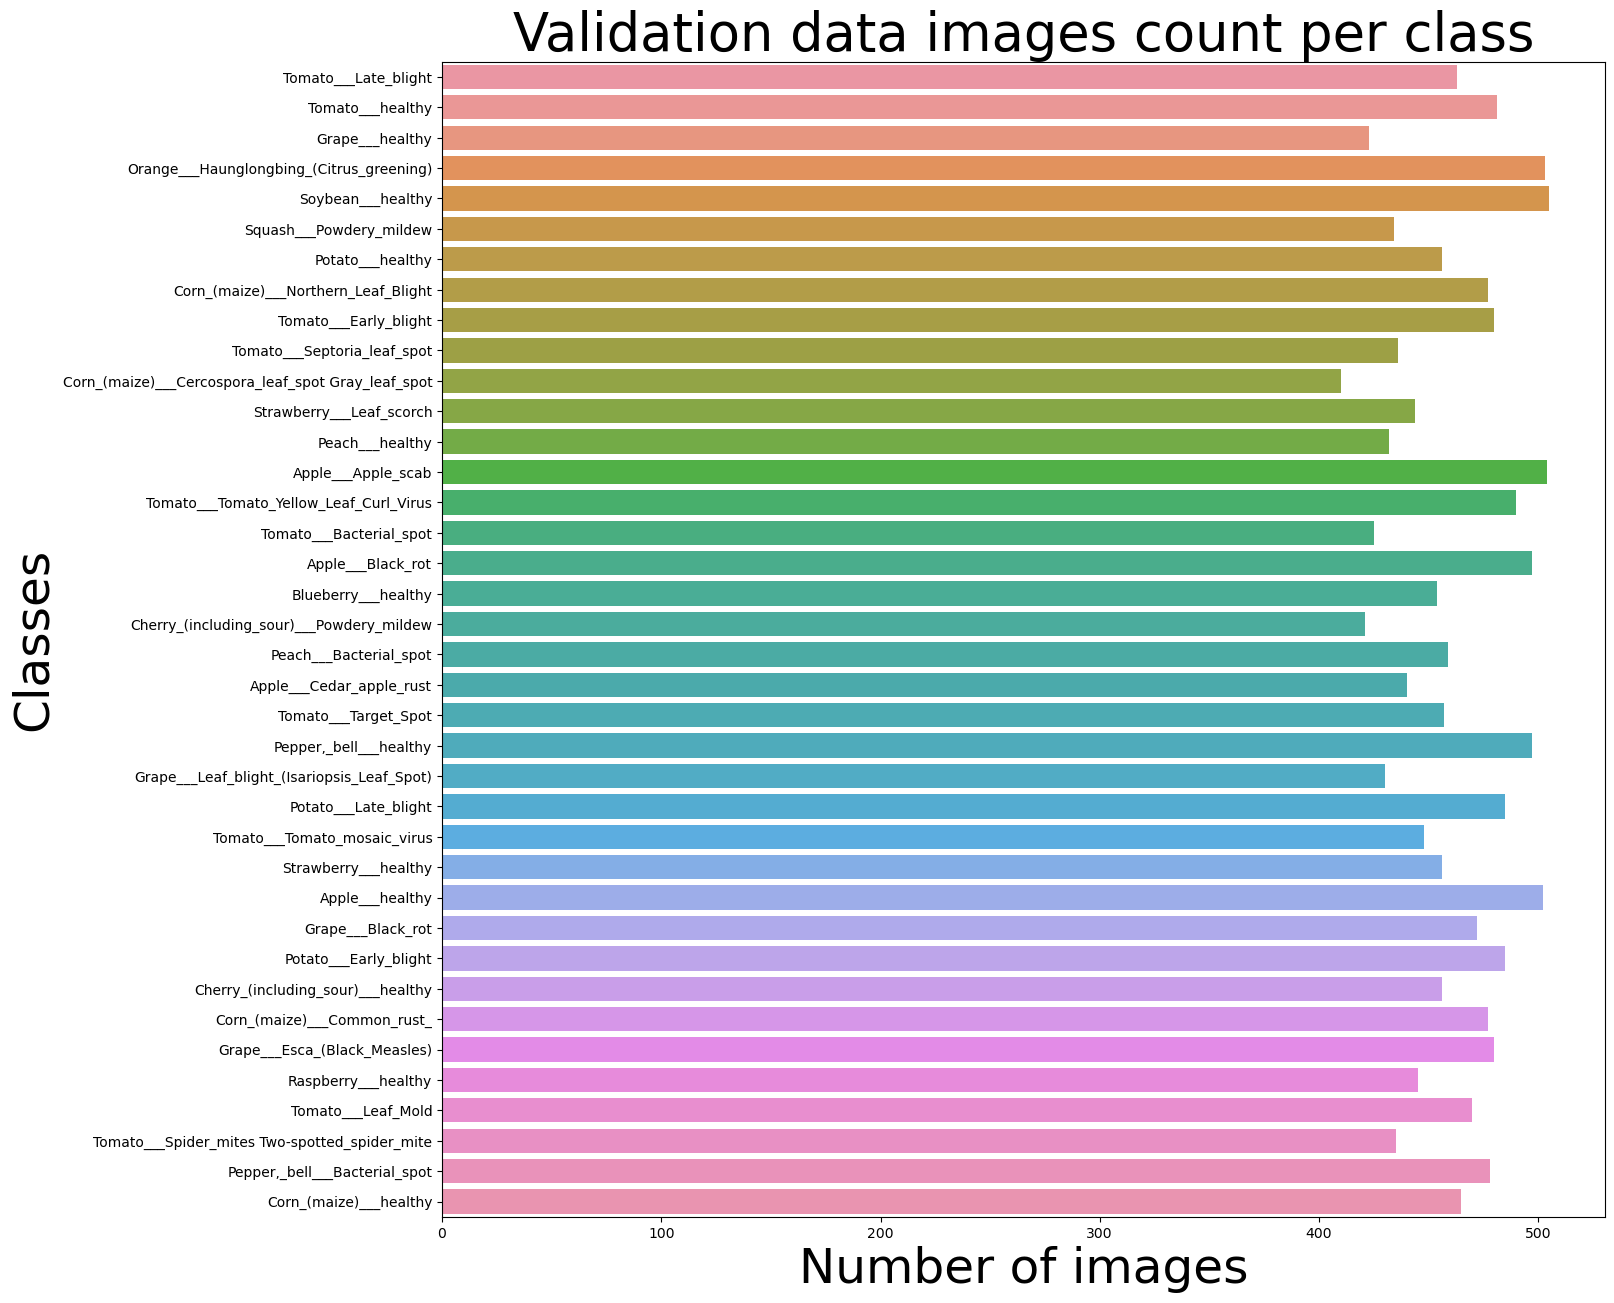

In [9]:
# Create a bar plot showing the count of validation images per class
plt.figure(figsize=(15,15))
plt.title("Validation data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_valid.keys())
vals=list(nums_valid.values())
sns.barplot(y=keys,x=vals)

In [10]:
#  Calculate the total number of images for training
total_train=0
for value in nums_train.values():
    total_train+=value
print("Total number of images for training : ", total_train)

Total number of images for training :  70295


In [11]:
#  Calculate the total number of images for validation
total_valid=0
for value in nums_valid.values():
    total_valid+=value
print("Total number of images for validation : ", total_valid)

Total number of images for validation :  17572


In [12]:
# Extract unique plant names and unique disease names from the list of diseases.
plants_unique=[]
diseases_unique=[]
for i in diseases:
    if(i.split('__'))[0] not in plants_unique:
        plants_unique.append(i.split('__')[0])
    if(i.split('___'))[1] != 'healthy':
        diseases_unique.append(i.split('___')[1])

In [13]:
# Print the unique plant names extracted from the list of diseases and display the total number of unique plant names
print('Plants : ', plants_unique)
print('-'*100)
print('Number of plants : ', len(plants_unique))

Plants :  ['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [14]:
# Print the unique plant diseases extracted from the list of diseases and display the total number of unique plant diseases
print('Diseases : ', diseases_unique)
print('-'*100)
print('Number of diseases : ', len(diseases_unique))

Diseases :  ['Late_blight', 'Haunglongbing_(Citrus_greening)', 'Powdery_mildew', 'Northern_Leaf_Blight', 'Early_blight', 'Septoria_leaf_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Leaf_scorch', 'Apple_scab', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Black_rot', 'Powdery_mildew', 'Bacterial_spot', 'Cedar_apple_rust', 'Target_Spot', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Late_blight', 'Tomato_mosaic_virus', 'Black_rot', 'Early_blight', 'Common_rust_', 'Esca_(Black_Measles)', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite', 'Bacterial_spot']
----------------------------------------------------------------------------------------------------
Number of diseases :  26


In [15]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [16]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [17]:
# Create generator objects for training and validation data by applying the rescaling layer to the images
train_gen = training_data.map(lambda image,label:(rescale(image),label))
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [18]:
# Create a convolutional neural network (CNN) model using the Sequential API in Keras

# Creates a sequential model, which is a linear stack of layers
model = Sequential()

# Add a series of convolutional and max pooling layers to the model
# The Conv2D layers perform convolutional operations on the input data, and the MaxPooling2D layers perform downsampling by taking the maximum value within each window
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
# Adds a flatten layer that converts the multi-dimensional output of the previous layer into a one-dimensional vector
model.add(Flatten())

# Add fully connected layers to the model. 
# The Dense layers are densely connected neural layers, and the Dropout layer applies dropout regularization to prevent overfitting
# The last Dense layer has a softmax activation function, which is suitable for multi-class classification problems
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Compiles the model, configuring the optimizer, loss function, and evaluation metrics for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model, displaying the layer configuration and the number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [19]:
# Train the Keras model using a generator for the training and validation data
history = model.fit_generator(train_gen, validation_data=valid_gen, epochs = 15)

Epoch 1/15
2197/2197 [==============================] - 314s 139ms/step - loss: 1.3834 - accuracy: 0.5937 - val_loss: 0.5172 - val_accuracy: 0.8370
Epoch 2/15
2197/2197 [==============================] - 151s 69ms/step - loss: 0.6085 - accuracy: 0.8103 - val_loss: 0.3639 - val_accuracy: 0.8808
Epoch 3/15
2197/2197 [==============================] - 154s 70ms/step - loss: 0.4268 - accuracy: 0.8626 - val_loss: 0.2373 - val_accuracy: 0.9211
Epoch 4/15
2197/2197 [==============================] - 133s 61ms/step - loss: 0.3173 - accuracy: 0.8968 - val_loss: 0.2579 - val_accuracy: 0.9192
Epoch 5/15
2197/2197 [==============================] - 135s 61ms/step - loss: 0.2507 - accuracy: 0.9188 - val_loss: 0.2133 - val_accuracy: 0.9335
Epoch 6/15
2197/2197 [==============================] - 139s 63ms/step - loss: 0.2152 - accuracy: 0.9309 - val_loss: 0.2366 - val_accuracy: 0.9288
Epoch 7/15
2197/2197 [==============================] - 133s 60ms/step - loss: 0.1816 - accuracy: 0.9409 - val_loss: 

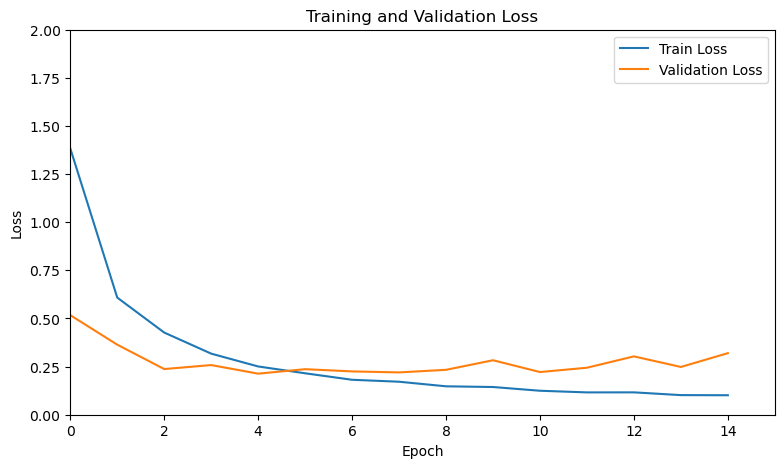

In [20]:
# Plot the training and validation loss over epochs
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 15)
plt.ylim(0.0,2.0)
plt.legend()

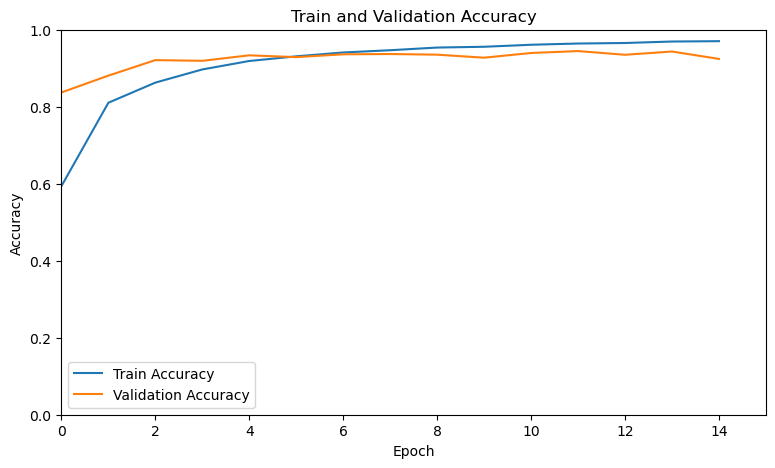

In [21]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 15)
plt.ylim(0, 1.0)
plt.legend()

In [22]:
# Obtain the labels and predictions for the validation data.
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 77ms/step


In [23]:
# Flatten the nested lists of predictions and labels
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [24]:
# Print various evaluation metrics based on the model's performance
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.03 %
Test Accuracy   : 92.42 %
Precision Score : 92.42 %
Recall Score    : 92.42 %


<Figure size 2000x500 with 0 Axes>

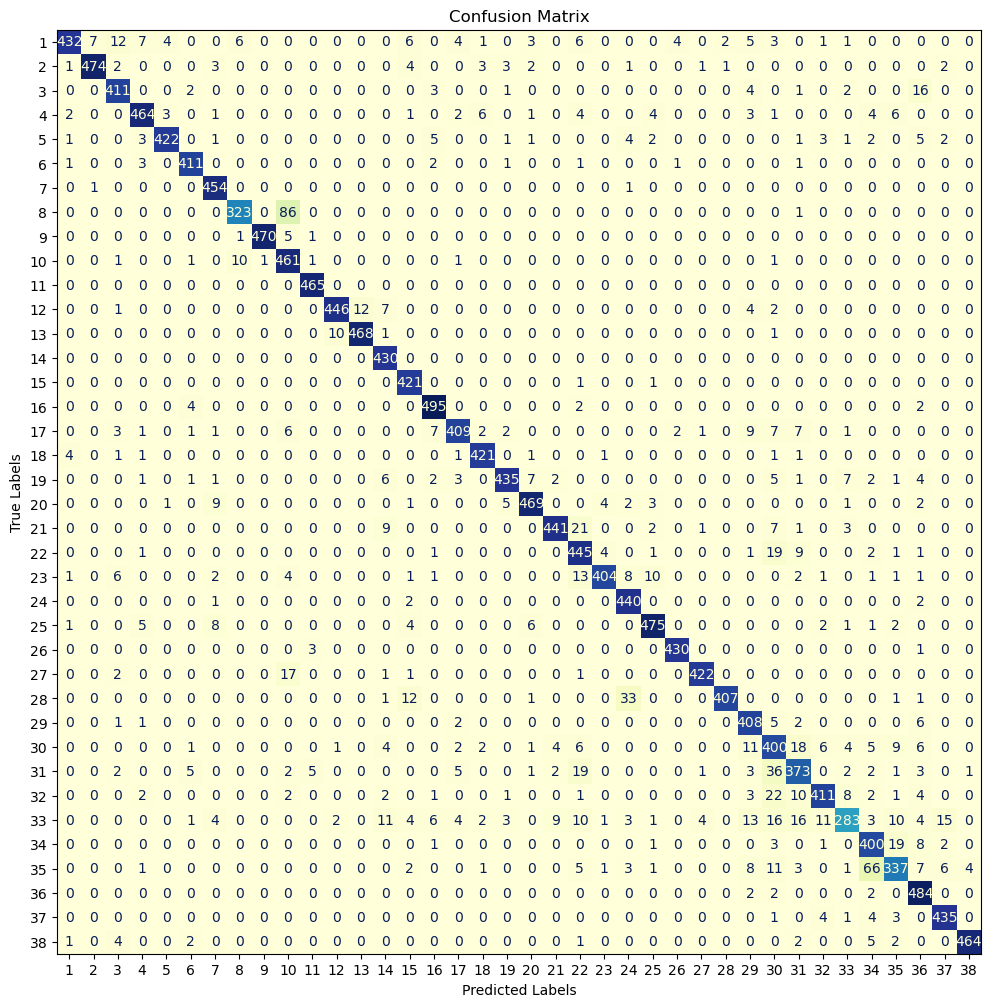

In [25]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

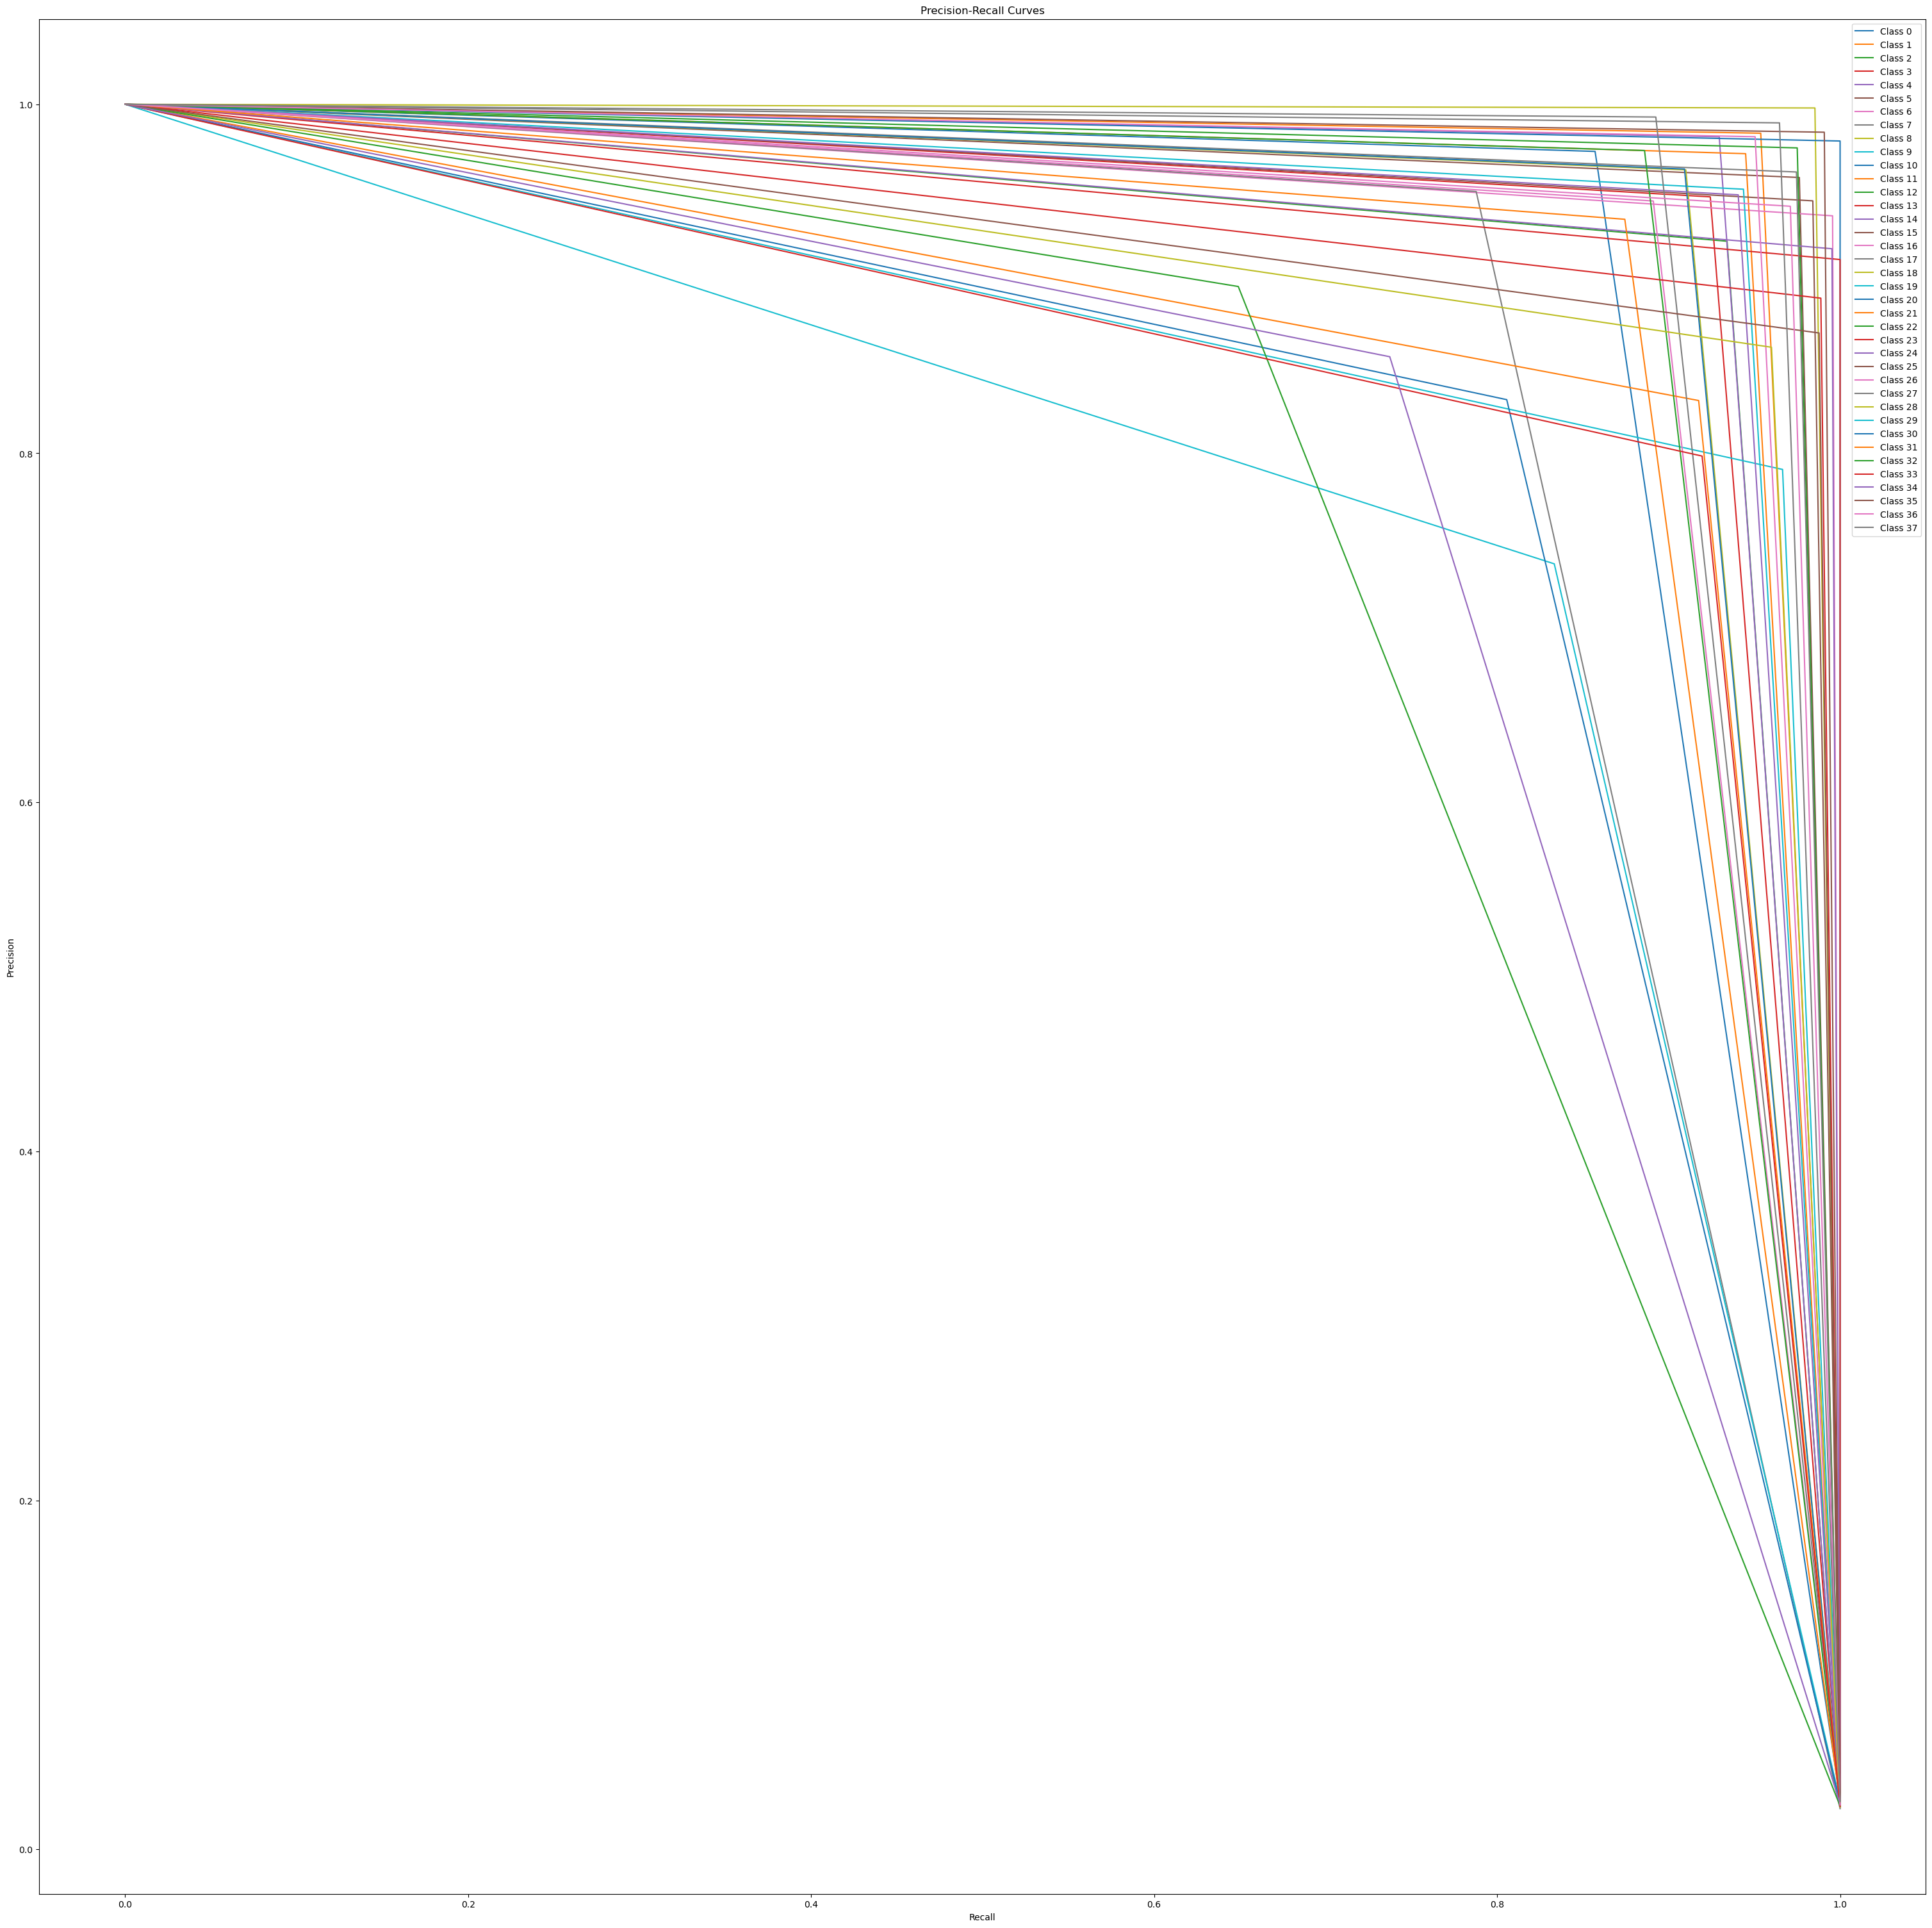

In [26]:
# Precision-recall curve

labels_array = np.array(labels)
predictions_array = np.array(predictions)

# Perform one-hot encoding on the labels and predictions
num_classes = 38  # Replace with the actual number of classes
labels_one_hot = label_binarize(labels_array, classes=range(num_classes))
predictions_one_hot = label_binarize(predictions_array, classes=range(num_classes))

precision = dict()
recall = dict()
plt.figure(figsize= (38,38))
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(labels_one_hot[:, i], predictions_one_hot[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


In [3]:
# Testing
Li = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
      'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
      'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
      'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
      'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
      'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
      'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
      'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="/kaggle/input/new-plant-diseases-dataset/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = Li[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/new-plant-diseases-dataset/test/test'